## Simple LangGraph

### State
First, define the State of the Graph

The State schema serves as the input schema for all Nodes and Edges in the graph.

TypedDict, provides types hints for the key value pairs

In [3]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

In [4]:
def start_play(state: State):
    print("Start play node has been called")
    return {"graph_info": state["graph_info"] + "I'm planning to play a game"}

def cricket(state: State):
    print("Cricket node has been called")
    return {"graph_info": state["graph_info"] + "cricket"}

def football(state: State):
    print("Football node has been called")
    return {"graph_info": state["graph_info"] + "football"}

In [5]:
import random
from typing import Literal

def random_game(state: State) -> Literal["cricket", "football"]:
    if random.random() > 0.5:
        return "cricket"
    else:
        return "football"

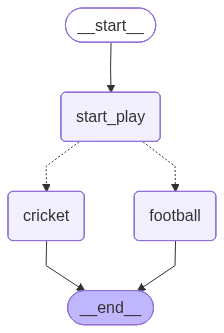

In [6]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build the graph
graph = StateGraph(State)

# add all the nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("football", football)

# Schedule the flow of the graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges(
    "start_play",
    random_game,
)
graph.add_edge("cricket", END)
graph.add_edge("football", END)

# Create the graph
graph_builder = graph.compile()

# Display the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [7]:
graph_builder.invoke({"graph_info":"My name is Sumanth"})

Start play node has been called
Football node has been called


{'graph_info': "My name is SumanthI'm planning to play a gamefootball"}

#### Important things to keep in mind

Starting with State - TypedDict. Think of this as a Schema. 

Every node takes the state variable with type State (TypedDict), and return state.

This State gets updated as we traverse through the nodes